<a href="https://colab.research.google.com/github/ShaunakSen/Deep-Learning/blob/master/full_stack_DL_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Full Stack DL

> Notes on course by Neuralearn.ai - https://www.youtube.com/playlist?list=PL2L83ZcMO-5O7zNycUkS5WLgr33J3QxMK

---

In [38]:
from tensorflow.keras.layers import Normalization, Dense, InputLayer
import tensorflow as tf
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
# dataset URL: https://www.kaggle.com/datasets/mayankpatel14/second-hand-used-cars-data-set-linear-regression

In [ ]:
data = pd.read_csv("./train.csv")

In [ ]:
data.head()

,v.id,on road old,on road now,years,km,rating,condition,economy,top speed,hp,torque,current price
0,1,535651,798186,3,78945,1,2,14,177,73,123,351318.0
1,2,591911,861056,6,117220,5,9,9,148,74,95,285001.5
2,3,686990,770762,2,132538,2,8,15,181,53,97,215386.0
3,4,573999,722381,4,101065,4,3,11,197,54,116,244295.5
4,5,691388,811335,6,61559,3,9,12,160,53,105,531114.5


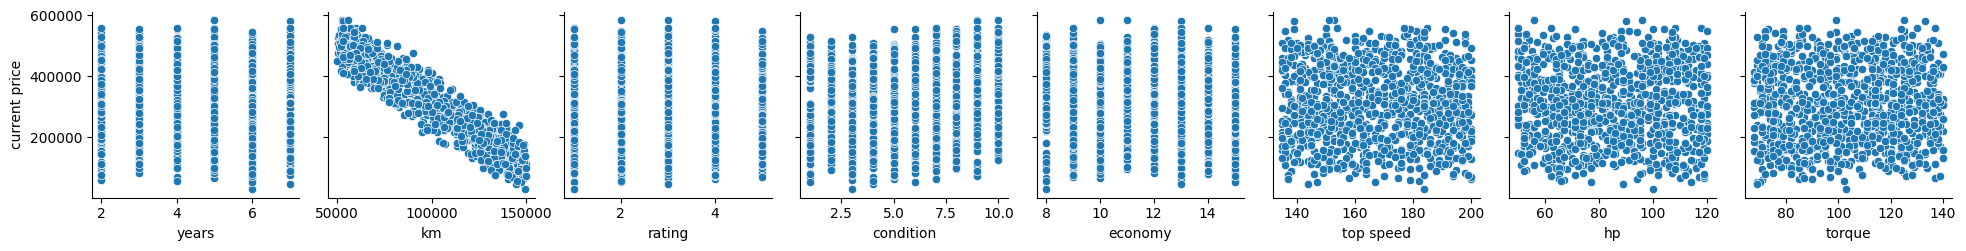

In [ ]:
sns.pairplot(data, x_vars=["years", "km", "rating", "condition", "economy",
                           "top speed", "hp", "torque"],
             y_vars=["current price"]);

In [ ]:
# convert data to tensor
tensor_data = tf.constant(data, dtype=tf.float32)
print (tensor_data.shape)
print (tensor_data.dtype)

(1000, 12)
<dtype: 'float32'>


In [ ]:
print (tensor_data[:5])

tf.Tensor(
[[1.000000e+00 5.356510e+05 7.981860e+05 3.000000e+00 7.894500e+04
  1.000000e+00 2.000000e+00 1.400000e+01 1.770000e+02 7.300000e+01
  1.230000e+02 3.513180e+05]
 [2.000000e+00 5.919110e+05 8.610560e+05 6.000000e+00 1.172200e+05
  5.000000e+00 9.000000e+00 9.000000e+00 1.480000e+02 7.400000e+01
  9.500000e+01 2.850015e+05]
 [3.000000e+00 6.869900e+05 7.707620e+05 2.000000e+00 1.325380e+05
  2.000000e+00 8.000000e+00 1.500000e+01 1.810000e+02 5.300000e+01
  9.700000e+01 2.153860e+05]
 [4.000000e+00 5.739990e+05 7.223810e+05 4.000000e+00 1.010650e+05
  4.000000e+00 3.000000e+00 1.100000e+01 1.970000e+02 5.400000e+01
  1.160000e+02 2.442955e+05]
 [5.000000e+00 6.913880e+05 8.113350e+05 6.000000e+00 6.155900e+04
  3.000000e+00 9.000000e+00 1.200000e+01 1.600000e+02 5.300000e+01
  1.050000e+02 5.311145e+05]], shape=(5, 12), dtype=float32)


In [ ]:
tensor_data = tf.random.shuffle(tensor_data)
print (tensor_data[:5])

tf.Tensor(
[[2.550000e+02 5.220550e+05 8.102900e+05 7.000000e+00 1.414060e+05
  3.000000e+00 7.000000e+00 1.300000e+01 1.560000e+02 1.110000e+02
  7.800000e+01 1.009270e+05]
 [6.760000e+02 5.792720e+05 7.054310e+05 6.000000e+00 6.964000e+04
  4.000000e+00 2.000000e+00 1.000000e+01 1.700000e+02 9.200000e+01
  7.000000e+01 3.606475e+05]
 [8.090000e+02 6.405090e+05 7.498930e+05 5.000000e+00 1.434100e+05
  1.000000e+00 7.000000e+00 9.000000e+00 1.790000e+02 8.000000e+01
  1.200000e+02 1.286325e+05]
 [1.800000e+02 6.479560e+05 8.595350e+05 6.000000e+00 8.507000e+04
  1.000000e+00 1.000000e+01 1.100000e+01 1.580000e+02 1.020000e+02
  1.300000e+02 4.598335e+05]
 [7.780000e+02 5.600660e+05 7.684540e+05 5.000000e+00 1.384140e+05
  4.000000e+00 6.000000e+00 1.400000e+01 1.550000e+02 7.900000e+01
  8.700000e+01 1.137000e+05]], shape=(5, 12), dtype=float32)


In [ ]:
data.columns

Index(['v.id', 'on road old', 'on road now', 'years', 'km', 'rating',
       'condition', 'economy', 'top speed', 'hp', 'torque', 'current price'],
      dtype='object')

In [ ]:
# training data: select all rows, all columns from 4th one upto second last one
X = tensor_data[:, 3:-1]

print (X.shape)

(1000, 8)


In [ ]:
y = tensor_data[:, -1]
print (y.shape)

(1000,)


In [ ]:
y = tf.expand_dims(y, axis=-1)
print (y.shape)

(1000, 1)


#### Normalization (standard scaler)

In [ ]:
adapt_data = np.array([1,2,3,4,5])
input_data = np.array([1,2,3])

layer = Normalization(axis=None)

In [ ]:
# Computes the mean and variance of values in a dataset.
# Calling adapt() on a Normalization layer is an alternative to
# passing in mean and variance arguments during layer construction
layer.adapt(adapt_data)

In [ ]:
layer.adapt_mean, layer.adapt_variance

(<tf.Variable 'mean:0' shape=() dtype=float32, numpy=3.0>,
 <tf.Variable 'variance:0' shape=() dtype=float32, numpy=2.0>)

In [ ]:
# now that mean and variance has been computed
# using `adapt_data` we can transform `input_data`
layer(input_data)

<tf.Tensor: shape=(3,), dtype=float32, numpy=array([-1.4142135 , -0.70710677,  0.        ], dtype=float32)>

We can also supply the mean and variance manually:

In [ ]:
# axis=-1 means the last axis, here columns
layer = Normalization(axis=-1, mean=5, variance=4)
x_normalized = tf.constant([[3,4,5,6,7],
                            [4,5,6,7,8]])

layer(x_normalized)

<tf.Tensor: shape=(2, 5), dtype=float32, numpy=
array([[-1. , -0.5,  0. ,  0.5,  1. ],
       [-0.5,  0. ,  0.5,  1. ,  1.5]], dtype=float32)>

In [ ]:
normalizer = Normalization()
normalizer.adapt(X)
normalizer(X).shape

TensorShape([1000, 8])

#### Creating first model

In [ ]:
normalizer(X)

In [40]:
model = tf.keras.Sequential(layers = [
    InputLayer(input_shape=(8,)), # input_shape: Shape tuple (not including the batch axis)
    normalizer,
    Dense(units=1, activation="linear") # 1 corr to 1 output
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normaliza  (None, 8)                 17        
 tion)                                                           
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 26 (108.00 Byte)
Trainable params: 9 (36.00 Byte)
Non-trainable params: 17 (72.00 Byte)
_________________________________________________________________


![](https://gcdnb.pbrd.co/images/xkTQnjd5F3EV.png)

m1-m8+c: 9 trainable params

17 non trainable params come from the norm layer - non trainable as we have already fitted the layer to our data

17: mean and variance for each feature (8.2) + bias (1)





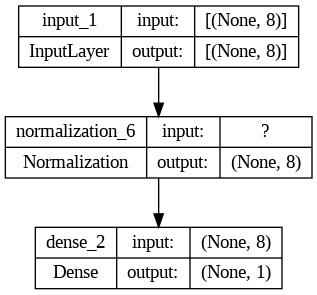

In [41]:
tf.keras.utils.plot_model(model, to_file="model.png", show_shapes=True)

The  input, normalization and dense layers accept input of shape `None, 8` None is for the batch size

Overfitting:

- Large batch size: With large batches, the gradient descent updates are based on a larger sample of the training data, potentially leading to an overemphasis on specific training examples and their noise. This can result in the model memorizing the training data but failing to generalize well to unseen data, causing overfitting.
- Small batch size: Smaller batches introduce more noise into the training process, preventing the model from capturing specific details and focusing on the underlying patterns. However, if the batch size is too small, the model might not learn enough from each mini-batch, potentially leading to underfitting.

Underfitting:

- Small batch size: As mentioned above, overly small batches can hinder the model's ability to learn the general patterns from the data, leading to underfitting. The model might not learn the complex relationships between features and fail to capture the underlying trends.
- Large batch size: While large batches can potentially lead to overfitting, they can also help underfitting in some cases. By providing a more consistent and representative sample of the data, large batches can help the model learn more robust and generalizable features.


In [ ]:
TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
DATASET_SIZE = len(X)

In [ ]:
# NOTE: we have already shuffled the data
X_train = X[:int(DATASET_SIZE*TRAIN_RATIO)]
y_train = y[:int(DATASET_SIZE*TRAIN_RATIO)]
print(X_train.shape)
print(y_train.shape)

(800, 8)
(800, 1)
